# Analýza vývoj HDP a délky života

## Úvod

Cílem této analýzy je, aby jste si udělali základní představu o tom,<br> jak se v zemích vyvíjí hrubý domácí produkt(HDP/hpd) a také jak se v nich mění průměrná délka života (DZ/dz).<br>Dále budeme ukazovat zda se mezi těmito veličinami panuje nějaká závislost.<br> Data jsme získali z webu <a href="https://ourworldindata.org/">Ourworldindata.org</a>.Vzhledem k rozsahu analyzujeme pouze 5 zemí v letech 2000 až 2017. Tyto země a období jsme obdrželi jako zadání od Codeademy, v rámci které jsme vytvářeli tento projekt.


## Data

Nyní provedu nahrání důležitých a potřebných knihoven pro zpracování<br> a také nahrání data do potřebného formátu.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels
from IPython.display import display

In [3]:
df = pd.read_csv("all_data.csv")

In [4]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Po zjištění datových typů,názvů sloupců a možných nulových proměnných jsem se rozhodl změnit název pro délku života<br> a datový typ u hrubého domácího produktu.Z tabulky jesně vidět, že zde nemáme žádné nulové hodnoty, takže není třeba hodnoty upravovat nebo doplňovat.


Pro přehlednost dat jsem se rozhodl gdp na **milliardy dolarů** pro lepší přehlednost v číslech <br>
a řád ve kterém se tato veličina standartně uvádí.

In [6]:
df.columns = map(str.lower,df.columns)
df.rename(columns={"life expectancy at birth (years)":"life_ex_years","gdp":"gdp_b"},inplace= True)
df.gdp_b = df.gdp_b/1000000000
df.head()

,country,year,life_ex_years,gdp_b
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


## Analýza

### Souhrn

Jako první chci zjistit jak často se lidé dožívají určitého věku v naši zemích a jaký je nejčastější hrubý domácí produkt v těchto zemích.

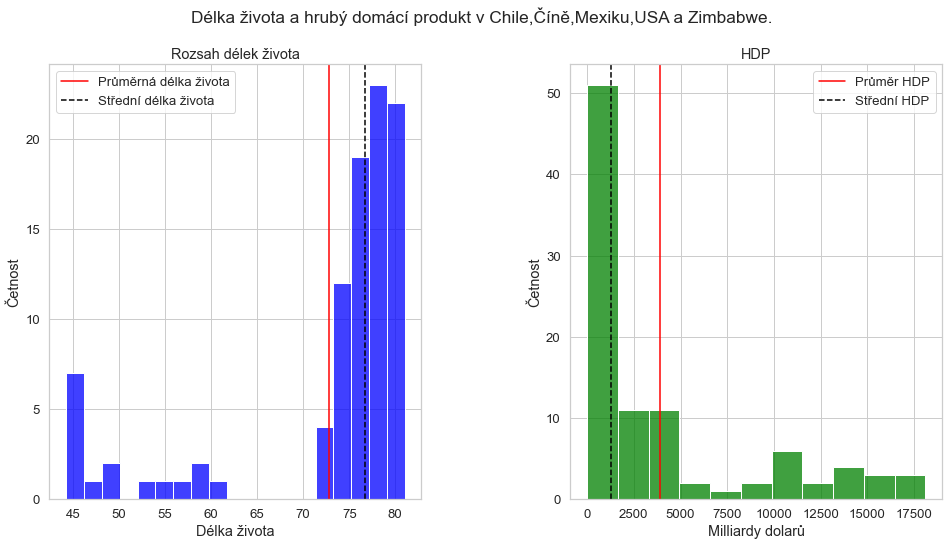

In [7]:
"""Je zde použita i angličtina, protože tato analýza bude dvojjazyčná."""
f = plt.figure(figsize = (16,8))
sns.set(font_scale = 1.2,style="whitegrid")

countries = df.country.unique()
countries_title = ", ".join(list(countries))
f.suptitle(f"Délka života a hrubý domácí produkt v Chile,Číně,Mexiku,USA a Zimbabwe.")
#f.suptitle(f"Length of life and gdp in the states of {countries_title}.")

plt.subplot(1,2,1)
ax = sns.histplot(df.life_ex_years, color = "blue")
mean_lf,med_lf = df.life_ex_years.mean(),df.life_ex_years.median()
#plt.axvline(mean_lf,color="red",linestyle="-",label="Average length of life")
#plt.axvline(med_lf,color="black",linestyle="--",label="Median length of life")
#ax.set_title("Life expectancy")
#ax.set_xlabel("Length of life")
#ax.set_ylabel("Occurence of life end")plt.axvline(df.life_ex_years.median(),color="black",linestyle="--",label="Střední délka života")plt.axvline(df.life_ex_years.mean(),color="red",linestyle="-",label="Průměrná délka života")
plt.axvline(mean_lf,color="red",linestyle="-",label="Průměrná délka života")
plt.axvline(med_lf,color="black",linestyle="--",label="Střední délka života")
ax.set_title("Rozsah délek života")
ax.set_xlabel("Délka života")
ax.set_ylabel("Četnost")
plt.legend()

plt.subplot(1,2,2)
ax2 = sns.histplot(df.gdp_b,color="green")
mean_gdp,med_gdp=df.gdp_b.mean(),df.gdp_b.median()
#plt.axvline(mean_gdp,color="red",linestyle="-",label="Average GDP")
#plt.axvline(med_gdp,color="black",linestyle="--",label="Median GDP")
#ax2.set_title("GDP")
#ax2.set_xlabel("Billions of dollars")
#ax2.set_ylabel("Occurence of earned billions")
plt.axvline(mean_gdp,color="red",linestyle="-",label="Průměr HDP")
plt.axvline(med_gdp,color="black",linestyle="--",label="Střední HDP")
ax2.set_title("HDP")
ax2.set_xlabel("Milliardy dolarů")
ax2.set_ylabel("Četnost")

plt.legend()

plt.subplots_adjust(wspace=0.4)
plt.savefig("imgs/hist_gdp_lfe_cz.png")
plt.show()

### Vývoj délky života a HDP

Chceme také zjistit jak se vyvíjela dosažené délky života v jednotlivých zemích v posledních letech.
<br>Dále chceme zjistit vývoj HDP v jednotlivých zemích v tomto období.

#### Délka života

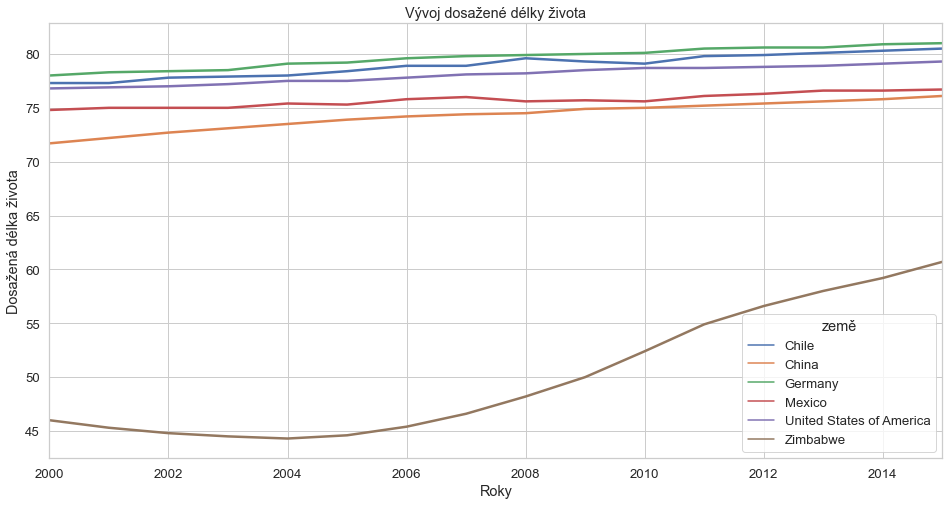

In [19]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(data =df,x ="year",y= "life_ex_years",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
plt.title("Vývoj dosažené délky života")
plt.ylabel("Dosažená délka života")
plt.xlabel("Roky")
plt.legend(title="země")
#plt.title("Growth in length of life",fontsize=20)
#plt.ylabel("Length of life")
plt.savefig("imgs/line_lfe_summary_cz.png")
plt.show()

Z grafu z je zřejmé, že nejvýrazněji se mění délka života z Zimbabwe.<br>
Pro lepší zobrazení rozdílů se vybereme všechny země mimo Zimbabwe. 

##### Vývoj délky života kromě Zimbabwe

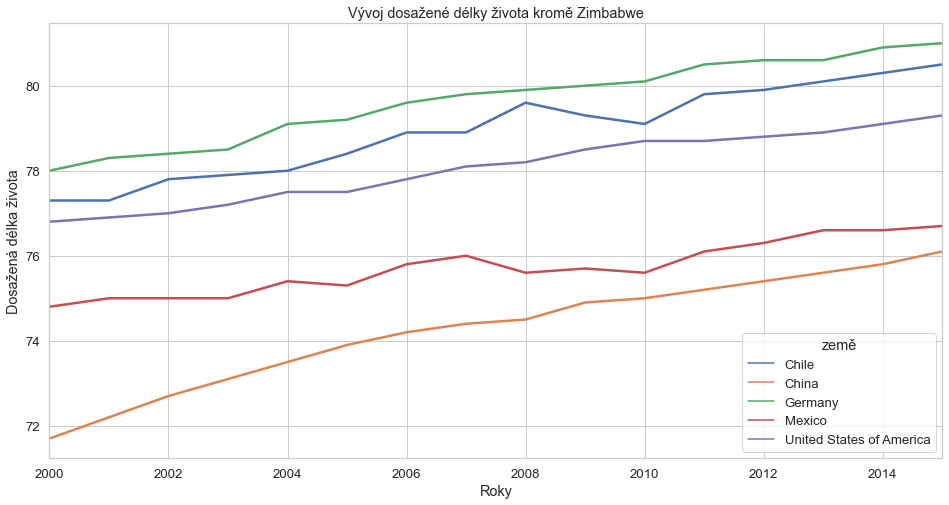

In [20]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(data = df[df.country != "Zimbabwe"],x ="year",y= "life_ex_years",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
plt.title("Vývoj dosažené délky života kromě Zimbabwe")
plt.ylabel("Dosažená délka života")
plt.xlabel("Roky")
plt.legend(title="země")
#plt.title("Growth in length of life",fontsize=20)
#plt.ylabel("Length of life")
plt.savefig("imgs/line_lfe_summary_xzimbabwe_cz.png")
plt.show()

Nyní máme graf daleko přehlednější pro vytváření závěrů.

#### HDP

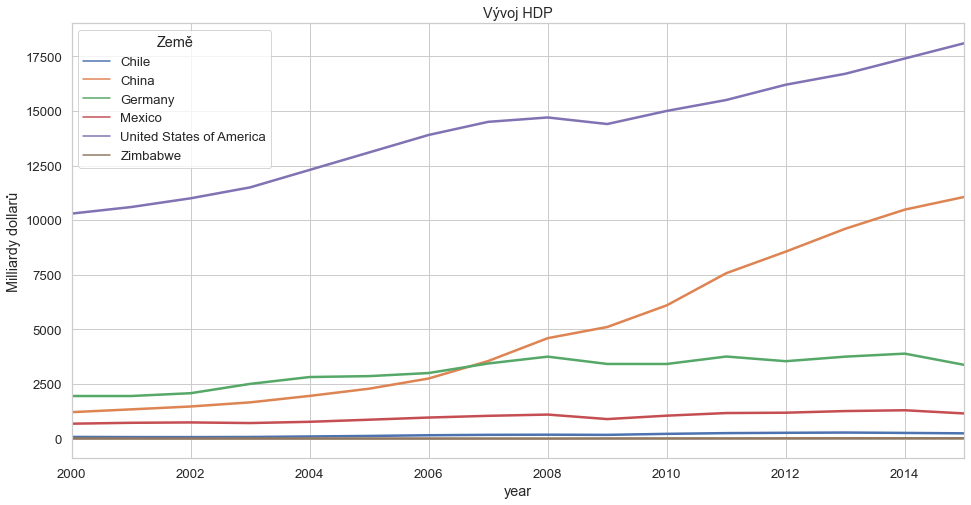

In [10]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
sns.lineplot(data =df,x ="year",y= "gdp_b",hue="country",markers=True,linewidth=2.5)
plt.xlim(2000,2015)
plt.title("Vývoj HDP")
plt.ylabel("Milliardy dollarů")
#plt.title("Growth in GPD",fontsize=20)
#plt.ylabel("Billions of dollars")
plt.legend(title= "Země")
plt.savefig("imgs/line_gdp_summary_cz.png")
plt.show()

Zde vidíme vývoj HDP v jednotlivých zemích. Je vidět, že nejvýraznější změna nastala v USA, kde došlo k velmi silnému růstu.<br> Jelikož máme vývoj v zemích s HDP nižším než 2500 milliard, tyto země si zobrazím podrobněji.


##### HDP v zemích s nižším HDP nižším

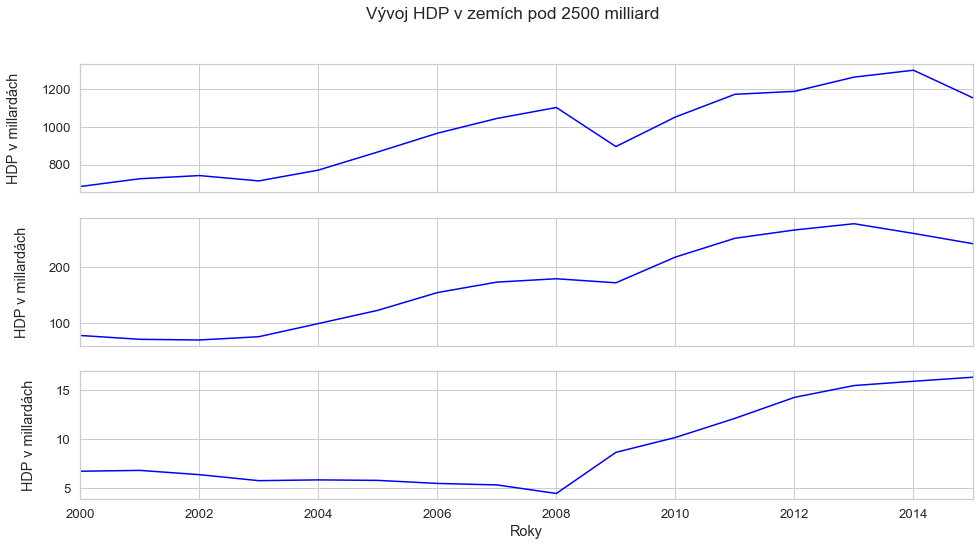

In [11]:
fig,axes = plt.subplots(3,figsize=(16,8),sharex=True)
lower_gdp_df = df[df.gdp_b < 2500]
for i,country in enumerate(["Mexico","Chile","Zimbabwe"]):
    sns.lineplot(data=lower_gdp_df[lower_gdp_df["country"] == country],x="year",y="gdp_b",ax=axes[i],color="blue")
    axes[i].set_ylabel("HDP v millardách",labelpad = 20)
    plt.subplots_adjust(hspace=0.2)
plt.xlabel("Roky")
plt.xlim(2000,2015)
fig.suptitle("Vývoj HDP v zemích pod 2500 milliard")
#plt.title("Growth in GPD",fontsize=20)
#plt.ylabel("Billions of dollars")
plt.savefig("imgs/line_gdp_lower_2500_cz.png")
plt.show()

Díky rozdělení grafu na jednotlivé země vidíme, že růst HDP i v těchto zemích nebyl zanedbatelný,<br> přestože to 
z celého pohledu tak vypadalo.


### Vztah mezi HDP a délkou života

Rád bych zjistil, jestli se nějaký vztah mezi tím jaké má země HDP a délka života v dané zemi.

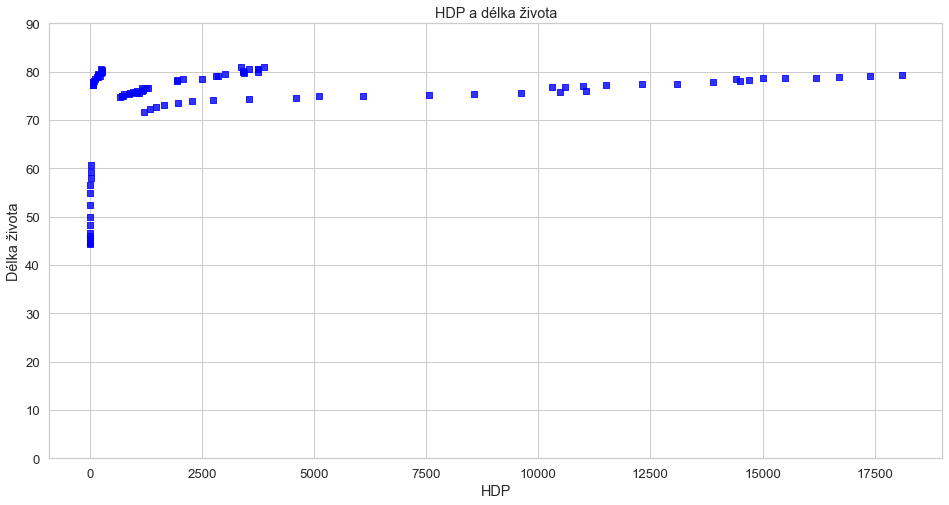

In [12]:
fig,axe= plt.subplots(1,1,figsize=(16,8))
hdp_scat = sns.regplot(data = df,x="gdp_b",y ="life_ex_years",ax=axe,
            marker="s",color="blue",fit_reg=False)
plt.title("HDP a délka života")
plt.xlabel("HDP")
plt.ylabel("Délka života")
plt.ylim(0,90)
plt.savefig("imgs/Scatter_gdp_lfe_cz.png")
plt.show()

Přestože zde můžeme vidět znaky lineárního růstu, je třeba si všimnout několika shluků, které mají velmi podobnou hodnotu HDP.<br>Proto provedeme logaritmickou transformaci, abychom dostali lepší zobrazení hodnot délky života.<br>

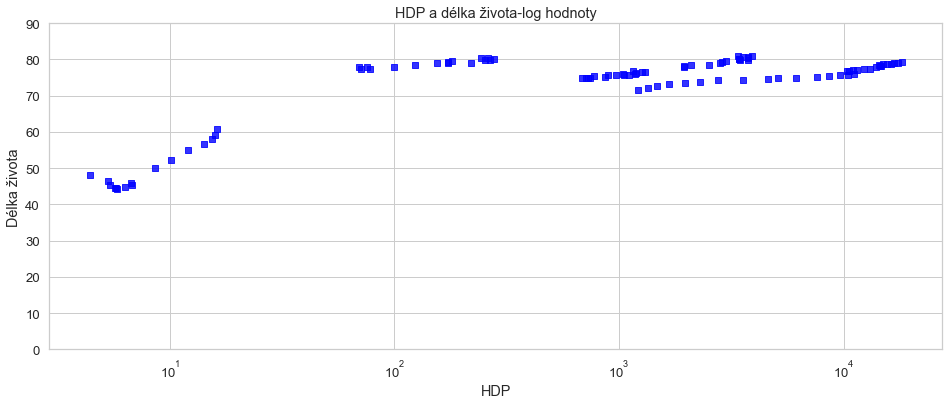

In [13]:
fig,axe= plt.subplots(1,1,figsize=(16,6))
hdp_scat = sns.regplot(data = df,x="gdp_b",y ="life_ex_years",ax=axe,
            marker="s",color="blue",fit_reg = False)
plt.title("HDP a délka života-log hodnoty")
plt.xlabel("HDP")
plt.ylabel("Délka života")
plt.ylim(0,90)
hdp_scat.set(xscale="log")
plt.savefig("imgs/scatter_log_gdp_lfe_cz.png")
plt.show()


## Závěr

### Výsledky

**Zjištěné pozorování a výsledky:**

* Z našeho histogramu je vidět, že průměrná délka života je častěji vyšší než 75, přestože průměrná délka života **{{round(mean_lf,3)}}** a střední hodnota je ještě vyšší **{{round(mean_lf,3)}}**. Toto je rozložení je dáno našimi krajními hodnotami, které vykazují levé zkosení.
* U HDP je situace opačná. V mnoha případech vykazují země v příjmy do 5000 milliard dollarů nebo nižší.Avšak několikrát ( bylo dosaženo vyšší příjmů), což vytváří zkosení grafu doprava. Je zde vidět, že průměrné HDP je vyšší střední hodnota.

In [14]:
cor,p_value = pearsonr(df.gdp_b,df.life_ex_years)
cor = round(cor,3)

![histogram](imgs/hist_gdp_lfe_cz.png)

#### Délka života

![život](imgs/line_lfe_summary_cz.png)

In [15]:
zim = df[df.country == "Zimbabwe"]
zim_lf_max = zim.life_ex_years.max()
zim_lf_min = zim.life_ex_years.min()
life_diff = round(zim_lf_max - zim_lf_min,2)

* Z grafu můžeme jasně vyčíst, že největší růst v dožitém věku se udál v Zimbabwe. Situace se nejdříve zhoršovala, nicméně se roku 2004 obrátila a do roku 2015 vzrostl dožitý věk z **{{zim_lf_min}}** na **{{zim_lf_max}}**. Délka se života se tím prodloužila o **{{life_diff}}** roku. To je růst **{{round(life_diff/df.life_ex_years.mean(),2)*100}}** % oproti průměrnému věku **{{round(df.life_ex_years.mean(),3)}}** . To představuje růst délky života **{{round(life_diff/11,3)}}** roku za každý rok.

* Podrobnější rozebrání zbývajících zemí zde není třeba, nicméně si zde uvedeme několik poznatků.

In [16]:
aver = df.life_ex_years.mean()
for i in countries[:5]:
    c,minimum,maximum = i,df[df.country == i].life_ex_years.min(),df[df.country == i].life_ex_years.max()
    diff = round(maximum - minimum,2)
    prct = round(diff/aver,2)
    print(f"""*   V {c} byl nejvyšší délka života {maximum} a nejnižší délka života {minimum}, což představuje rozdíl {diff} roku.
          To je {prct}% průměrného věku.""")
    

*   V Chile byl nejvyšší délka života 80.5 a nejnižší délka života 77.3, což představuje rozdíl 3.2 roku.
          To je 0.04% průměrného věku.
*   V China byl nejvyšší délka života 76.1 a nejnižší délka života 71.7, což představuje rozdíl 4.4 roku.
          To je 0.06% průměrného věku.
*   V Germany byl nejvyšší délka života 81.0 a nejnižší délka života 78.0, což představuje rozdíl 3.0 roku.
          To je 0.04% průměrného věku.
*   V Mexico byl nejvyšší délka života 76.7 a nejnižší délka života 74.8, což představuje rozdíl 1.9 roku.
          To je 0.03% průměrného věku.
*   V United States of America byl nejvyšší délka života 79.3 a nejnižší délka života 76.8, což představuje rozdíl 2.5 roku.
          To je 0.03% průměrného věku.


![](imgs/line_lfe_summary_xzimbabwe_cz.png)

#### HDP

![](imgs/line_gdp_summary_cz.png)

* U HDP mě zajímá několik věcí. 
    * Jak moc vyrostly jednotlivé země
    * Jak moc vyrostly země, které nedosáhly více než 2500 milliard dollarů
 
    

In [17]:
def cagr(first,last,n_years):
    """This function counts compound annual growth rate. For more info visit this link:
    https://www.investopedia.com/terms/c/cagr.asp/ """
    return (last/first) ** (1/n_years) - 1


for i in countries:
    df_cr = df[df.country == i]
    first_year,last_year = df_cr.gdp_b.iloc[0],df_cr.gdp_b.iloc[-1]
    prct = cagr(first_year,last_year,len(df_cr))
    print(f"""V {i} byla počáteční hodnota HDP {first_year} a poslední {last_year}.
    To tvoří rozdíl {last_year-first_year} milliardy dollarů. Průměrně HDP této země rostlo o {prct:.2%} procent ročně.\n""")

V Chile byla počáteční hodnota HDP 77.860932152 a poslední 242.518.
    To tvoří rozdíl 164.657067848 milliardy dollarů. Průměrně HDP této země rostlo o 7.36% procent ročně.

V China byla počáteční hodnota HDP 1211.35 a poslední 11064.7.
    To tvoří rozdíl 9853.35 milliardy dollarů. Průměrně HDP této země rostlo o 14.83% procent ročně.

V Germany byla počáteční hodnota HDP 1949.95 a poslední 3375.61.
    To tvoří rozdíl 1425.66 milliardy dollarů. Průměrně HDP této země rostlo o 3.49% procent ročně.

V Mexico byla počáteční hodnota HDP 683.648 a poslední 1152.26.
    To tvoří rozdíl 468.61199999999997 milliardy dollarů. Průměrně HDP této země rostlo o 3.32% procent ročně.

V United States of America byla počáteční hodnota HDP 10300.0 a poslední 18100.0.
    To tvoří rozdíl 7800.0 milliardy dollarů. Průměrně HDP této země rostlo o 3.59% procent ročně.

V Zimbabwe byla počáteční hodnota HDP 6.6899576 a poslední 16.304667807.
    To tvoří rozdíl 9.614710207000002 milliardy dollarů. Průměr

#### Vztah mezi HDP a délkou života

![](imgs/Scatter_gdp_lfe_cz.png)

In [18]:
r,p_value = pearsonr(df.gdp_b,df.life_ex_years)

Závěrem zjistíme, jestli existuje určitá korelace mezi HDP a délkou života.
Korelace vystihuje vztah mezi dvěma veličinami v míře od -1 do 1 a ukazuje jak jedna veličina ovlivňuje druhou.
Tato hodnota nijak nevystihuje která hodnota je příčinou a která následkem daného jevu.Pro výpočet korelace jsem použil původní hodnoty.
Pro vztah HDP a délky života nám mi vyšla korelace **{{round(r,2)}}**, což nám ukazuje silnou korelaci mezi těmito dvě veličinami.